Rudimentary regression analysis to test the data...

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('simulated_salary_data.csv')

In [4]:
df

,years_experience,education_level,job_category,company_size,salary,num_employees,has_higher_studies
0,7,Bachelor,Business Analyst,Large,37995,6215,0
1,20,Bachelor,Project Manager,Medium,69749,1232,0
2,15,Bachelor,Project Manager,Medium,62176,1364,0
3,11,Master,QA Engineer,Large,49238,6769,1
4,8,Bachelor,Business Analyst,Small,39353,471,0
...,...,...,...,...,...,...,...
14995,17,PhD,Data Analyst,Medium,64962,1264,1
14996,18,Master,Software Developer,Medium,55357,1755,1
14997,2,PhD,Project Manager,Large,51628,4809,1
14998,3,PhD,Software Developer,Medium,45958,998,1


In [5]:
df.describe()

,years_experience,salary,num_employees,has_higher_studies
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,10.596533,57919.344000,2491.658867,0.751867
std,5.768891,11504.881416,2823.775640,0.431944
min,1.000000,24587.000000,50.000000,0.000000
25%,6.000000,49664.750000,388.750000,1.000000
50%,11.000000,57829.000000,1237.000000,1.000000
75%,16.000000,65932.750000,4013.000000,1.000000
max,20.000000,95751.000000,9998.000000,1.000000


In [ ]:
# new column, to decide if education beyod bachelors matters...
df['has_higher_studies'] = np.where(df['education_level'] != 'Bachelor', 1, 0)
coding)

In [ ]:
# find out how salary changes as a function of experience and education
X = df[['years_experience', 'has_higher_studies']] 
y = df['salary'] 

In [6]:
# check what the dataframe looks like now...
df.head()

,years_experience,education_level,job_category,company_size,salary,num_employees,has_higher_studies
0,7,Bachelor,Business Analyst,Large,37995,6215,0
1,20,Bachelor,Project Manager,Medium,69749,1232,0
2,15,Bachelor,Project Manager,Medium,62176,1364,0
3,11,Master,QA Engineer,Large,49238,6769,1
4,8,Bachelor,Business Analyst,Small,39353,471,0


In [7]:
# ye bhee kar ke dekh lo...
df.describe()

,years_experience,salary,num_employees,has_higher_studies
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,10.596533,57919.344000,2491.658867,0.751867
std,5.768891,11504.881416,2823.775640,0.431944
min,1.000000,24587.000000,50.000000,0.000000
25%,6.000000,49664.750000,388.750000,1.000000
50%,11.000000,57829.000000,1237.000000,1.000000
75%,16.000000,65932.750000,4013.000000,1.000000
max,20.000000,95751.000000,9998.000000,1.000000


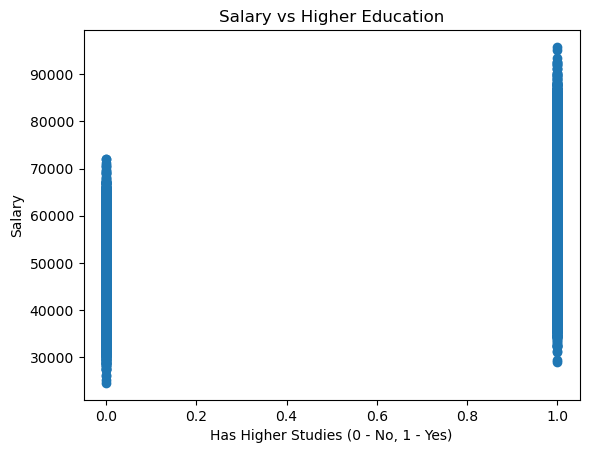

In [18]:
# I don't know why I am creating a scatter plot...
# it's likely not going to show anything meaningful
# try to check the correlation between higher studies and salar
plt.scatter(df['has_higher_studies'], df['salary'])
plt.xlabel('Has Higher Studies (0 - No, 1 - Yes)')
plt.ylabel('Salary')
plt.title('Salary vs Higher Education')
plt.show()

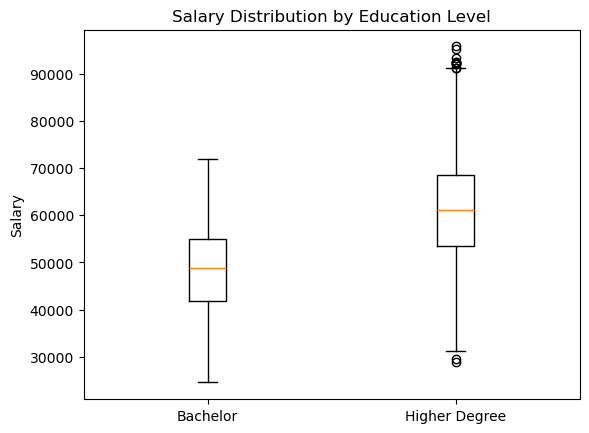

In [20]:
# idhar jyada samjhega
plt.boxplot([df[df['has_higher_studies'] == 0]['salary'], 
             df[df['has_higher_studies'] == 1]['salary']],
            labels=['Bachelor', 'Higher Degree'])
plt.ylabel('Salary')
plt.title('Salary Distribution by Education Level')
plt.show() 

In [8]:
# Life, universe and everthing...
# keep 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [9]:
# fit, then predict...
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
# how did we do?
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 54098353.64998039
R-squared: 0.590078911779181


In [ ]:
model_ols = sm.OLS(y_train, X_train).fit()

In [16]:
dir(model_ols)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [15]:
print(model_ols.summary())
# 'has_higher_studies' - 
# positive value indicates a trend 
# of higher salaries associated with higher degrees

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          8.626e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:34:54   Log-Likelihood:                     -1.3247e+05
No. Observations:               12000   AIC:                                  2.649e+05
Df Residuals:                   11998   BIC:                                  2.650e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

AttributeError: 'OLSResults' object has no attribute 'coef_has_higher_studies'

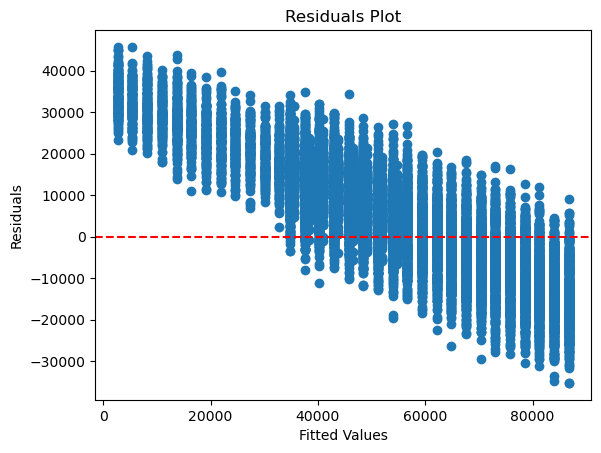

In [22]:
# residuals should look like equally distributed in random data
# ours is simulated, congratulations... :P
residuals = model_ols.resid 

plt.scatter(model_ols.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--') # Adds a reference line
plt.show()